In [50]:
# Import standard libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, log_loss, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
df_birds = pd.read_csv('bird_dataset.csv', index_col=0)

In [8]:
df_birds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9597 entries, 1 to 9985
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SpecID                         9597 non-null   float64
 1   PassNonPass                    9597 non-null   object 
 2   IOCOrder                       9597 non-null   object 
 3   BLFamilyLatin                  9597 non-null   object 
 4   BLFamilyEnglish                9597 non-null   object 
 5   BLFamSequID                    9597 non-null   float64
 6   Taxo                           9597 non-null   object 
 7   Scientific                     9597 non-null   object 
 8   English                        9597 non-null   object 
 9   Diet-Inv                       9597 non-null   float64
 10  Diet-Vend                      9597 non-null   float64
 11  Diet-Vect                      9597 non-null   float64
 12  Diet-Vfish                     9597 non-null   f

In [20]:
num_cols = [c for c in df_birds.columns if df_birds[c].dtype in ['float64', 'int64']]

In [26]:
X = df_birds[num_cols].copy()
X.drop(columns=['SpecID', 'BLFamSequID', 'SpcRecID'], axis=1, inplace=True)

In [33]:
y = pd.DataFrame(df_birds['Global IUCN Red List Category'])
y['threatened'] = 0

In [37]:
y.loc[(y['Global IUCN Red List Category'] == 'VU') |
      (y['Global IUCN Red List Category'] == 'EN') |
      (y['Global IUCN Red List Category'] == 'CR') |
      (y['Global IUCN Red List Category'] == 'CR(PE)'), 'threatened'] = 1

y.drop('Global IUCN Red List Category', axis=1, inplace=True)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
# Create logistic regression

simple_model = LogisticRegression(random_state=42)

simple_model.fit(X_train, y_train)

/Users/jeffreymarvel/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jeffreymarvel/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [46]:
y_test_preds = simple_model.predict(X_test)

In [47]:
print(f"Accuracy: {accuracy_score(y_test, y_test_preds)}")
print(f"Precision: {precision_score(y_test, y_test_preds)}")
print(f"Recall: {recall_score(y_test, y_test_preds)}")

Accuracy: 0.8554166666666667
Precision: 0.0
Recall: 0.0


/Users/jeffreymarvel/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


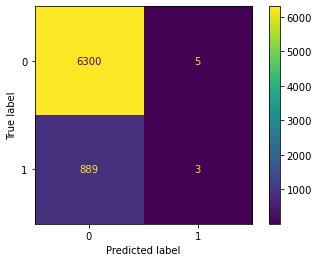

In [52]:
plot_confusion_matrix(simple_model, X_train, y_train);

## Summary

- First, dumb model failed to converge by using most variables available
- The result had a significant number of false negatives, and only correctly predicted 3 birds that were actually threatened